In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=16cc3bfe29604bfa1c30d29116ef01b49c9d05bf9c647c5520c5107b1a0f843e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from apyori import apriori
from sklearn.metrics.pairwise import cosine_similarity
import operator
from scipy.sparse.linalg import svds
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

# Cargar datos

In [3]:
# Carga Ordenes
#dfOrdenes = pd.read_csv('/content/drive/MyDrive/Cursos/Coursera/Maestría en Inteligencia Analítica de Datos/202214/Aprendizaje no supervisado/Proyecto Aprendizaje No Supervisado/data/olist_orders_dataset.csv')
url = 'https://github.com/alfarodaniel/sistema-recomendacion-canasta-productos/blob/main/data/olist_orders_dataset.csv?raw=true'
dfOrdenes = pd.read_csv(url)
dfOrdenes.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [4]:
# Carga OrdenesItems
#dfOrdenesItems = pd.read_csv('/content/drive/MyDrive/Cursos/Coursera/Maestría en Inteligencia Analítica de Datos/202214/Aprendizaje no supervisado/Proyecto Aprendizaje No Supervisado/data/olist_order_items_dataset.csv')
url = 'https://github.com/alfarodaniel/sistema-recomendacion-canasta-productos/blob/main/data/olist_order_items_dataset.csv?raw=true'
dfOrdenesItems = pd.read_csv(url)
dfOrdenesItems.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [5]:
# Carga Productos
#dfProductos = pd.read_csv('/content/drive/MyDrive/Cursos/Coursera/Maestría en Inteligencia Analítica de Datos/202214/Aprendizaje no supervisado/Proyecto Aprendizaje No Supervisado/data/olist_products_dataset.csv')
url = 'https://github.com/alfarodaniel/sistema-recomendacion-canasta-productos/blob/main/data/olist_products_dataset.csv?raw=true'
dfProductos = pd.read_csv(url)
dfProductos.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [6]:
# Carga Clientes
#dfClientes = pd.read_csv('/content/drive/MyDrive/Cursos/Coursera/Maestría en Inteligencia Analítica de Datos/202214/Aprendizaje no supervisado/Proyecto Aprendizaje No Supervisado/data/olist_customers_dataset.csv')
url = 'https://github.com/alfarodaniel/sistema-recomendacion-canasta-productos/blob/main/data/olist_customers_dataset.csv?raw=true'
dfClientes = pd.read_csv(url)
dfClientes.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [7]:
# Carga Calificaciones
#dfCalificaciones = pd.read_csv('/content/drive/MyDrive/Cursos/Coursera/Maestría en Inteligencia Analítica de Datos/202214/Aprendizaje no supervisado/Proyecto Aprendizaje No Supervisado/data/olist_order_reviews_dataset.csv')
url = 'https://github.com/alfarodaniel/sistema-recomendacion-canasta-productos/blob/main/data/olist_order_reviews_dataset.csv?raw=true'
dfCalificaciones = pd.read_csv(url)
dfCalificaciones.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


# Crea Órdenes-Items-Consolidado

In [8]:
# Funciones

# Funcion histograma de elemento
def graficarHistograma(df, ax, elemento, bins):
    ax.hist(x = df[elemento],
            # Intervalos
            bins = bins,
            label = 'moda: {}\nmediana: {}\nmedia: {}'.format(list(df[elemento].mode()[:5]),
                                                              int(df[elemento].median()),
                                                              int(df[elemento].mean())),
            rwidth = 0.8)
    ax.set_title('Histograma'),
    ax.legend()

# Funcion histograma de elemento
def graficarBoxplot(df, ax, elemento):
    bp1 = ax.boxplot(df[elemento])
    ax.set_title('Diagrama de Caja'),
    ax.legend([bp1["boxes"][0]],
              ['min: {}\nmax: {}\nrango: {}\nIQR: {}\nvar: {}\nstd: {}\nCV: {}'.format(min(df[elemento]),
                                                                                max(df[elemento]),
                                                                                max(df[elemento])-min(df[elemento]),
                                                                                int(df[elemento].quantile(0.75)-df[elemento].quantile(0.25)),
                                                                                int(df[elemento].var()),
                                                                                int(df[elemento].std()),
                                                                                round(df[elemento].std()/df[elemento].mean(),2))])

# Función Gráficas de tendencia central y dispersión
def tendencia(df, elemento):
    fig, ax = plt.subplots(1, 2, figsize=(15,3))
    fig.suptitle(elemento, fontsize=20)
    graficarHistograma(df, ax[0], elemento, 10)
    graficarBoxplot(df, ax[1], elemento)
    plt.show()

In [9]:
# crea dataframe Órdenes-Items-Consolidado dfConsolidado
# Une dfOrdenesItems con dfOrdenes y crea dfConsolidado
dfConsolidado = dfOrdenesItems[['order_id','product_id']].merge(dfOrdenes[['order_id', 'customer_id', 'order_purchase_timestamp']])
# Une dfConsolidado con dfProductos
dfConsolidado = dfConsolidado.merge(dfProductos[['product_id', 'product_category_name']])
# Une dfConsolidado con dfClientes
#dfConsolidado = dfConsolidado.merge(dfClientes[['customer_id', 'customer_city']])
# Une dfConsolidado con dfCalificaciones
dfConsolidado = dfConsolidado.merge(dfCalificaciones[['order_id', 'review_score']].drop_duplicates('order_id', keep='first'), how='left')
# Reemplaza faltantes de product_category_name y review_score
dfConsolidado = dfConsolidado.fillna({'product_category_name':'no_category', 'review_score':3})
# Crea producto uniendo categoria y product_id
dfConsolidado['producto'] = dfConsolidado['product_category_name'] + '_' + dfConsolidado['product_id'].str[:8]
# Selecciona las columas finales
dfConsolidado = dfConsolidado[['order_id', 'producto', 'customer_id', 'review_score']]
dfConsolidado.describe(include='all')

,order_id,producto,customer_id,review_score
count,112650,112650,112650,112650.000000
unique,98666,32951,98666,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,moveis_decoracao_aca2eb7d,fc3d1daec319d62d49bfb5e1f83123e9,NaN
freq,21,527,21,NaN
mean,NaN,NaN,NaN,4.024874
std,NaN,NaN,NaN,1.384475
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,5.000000


[Text(0.5, 1.0, 'Frecuencia de product_id')]

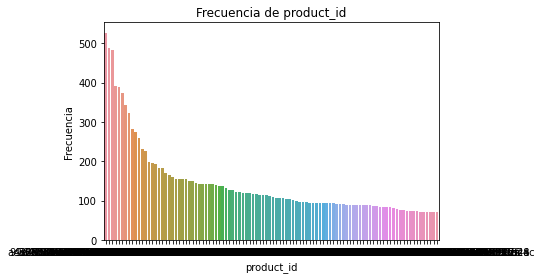

In [10]:
# Grafica frecuencia product_id
df = pd.DataFrame(dfOrdenesItems['product_id'].value_counts()).reset_index()
df.columns = ['product_id', 'Frecuencia']
sns.barplot(x='product_id', y='Frecuencia', data=df[:100]).set(title='Frecuencia de product_id')

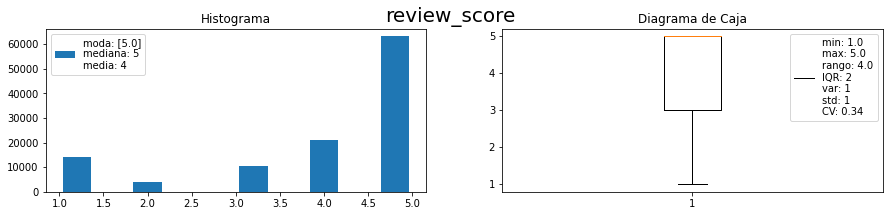

In [11]:
# Grafica la distribución de nro_reproducciones
tendencia(dfConsolidado, 'review_score')

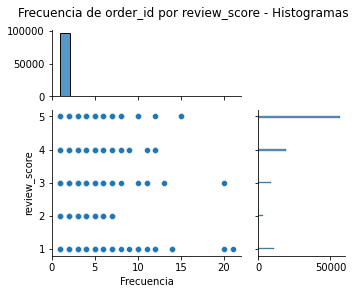

In [12]:
df = pd.DataFrame(dfConsolidado[['order_id', 'review_score']].value_counts()).reset_index()
df.columns = ['order_id', 'review_score', 'Frecuencia']
# Clusters de Ingreso por Puntaje_Gasto e Histogramas
g = sns.jointplot(data=df, x='Frecuencia', y='review_score', palette='bright', height=5, ratio=2, marginal_ticks=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Frecuencia de order_id por review_score - Histogramas')
g.fig.set_figwidth(5)
g.fig.set_figheight(4)

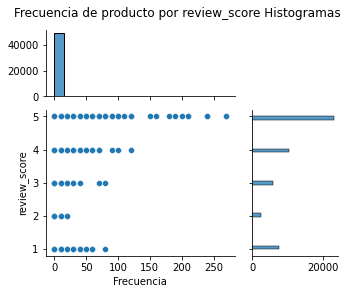

In [13]:
df = pd.DataFrame(dfConsolidado[['producto', 'review_score']].value_counts()).reset_index()
df.columns = ['producto', 'review_score', 'Frecuencia']
df['Frecuencia'] = round(df['Frecuencia'],-1)
# Clusters de Ingreso por Puntaje_Gasto e Histogramas
g = sns.jointplot(data=df, x='Frecuencia', y='review_score', palette='bright', height=5, ratio=2, marginal_ticks=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Frecuencia de producto por review_score Histogramas')
g.fig.set_figwidth(5)
g.fig.set_figheight(4)

[Text(0.5, 1.0, 'Histograma de producto')]

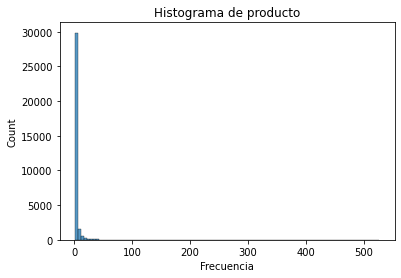

In [14]:
# Grafica frecuencia producto
df = pd.DataFrame(dfConsolidado['producto'].value_counts()).reset_index()
df.columns = ['producto', 'Frecuencia']
sns.histplot(x='Frecuencia', data=df, bins=100).set(title='Histograma de producto')

In [15]:
df.Frecuencia.value_counts()

1      18117
2       5817
3       2651
4       1534
5        994
       ...  
118        1
488        1
131        1
137        1
527        1
Name: Frecuencia, Length: 138, dtype: int64

[Text(0.5, 1.0, 'Histograma de order_id')]

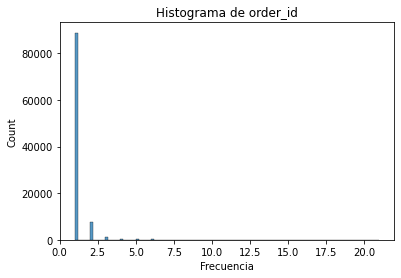

In [16]:
# Grafica frecuencia order_id
df = pd.DataFrame(dfConsolidado['order_id'].value_counts()).reset_index()
df.columns = ['order_id', 'Frecuencia']
sns.histplot(x='Frecuencia', data=df, bins=100).set(title='Histograma de order_id')

[Text(0.5, 1.0, 'Frecuencia de order_id')]

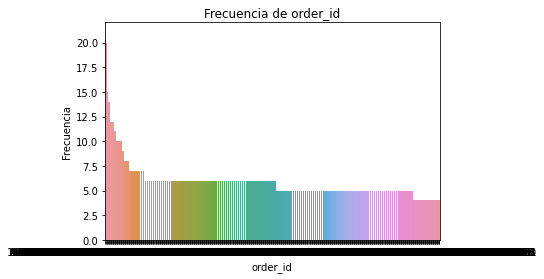

In [17]:
# Grafica frecuencia product_id
df = pd.DataFrame(dfConsolidado['order_id'].value_counts()).reset_index()
df.columns = ['order_id', 'Frecuencia']
sns.barplot(x='order_id', y='Frecuencia', data=df[:500]).set(title='Frecuencia de order_id')

In [18]:
df.Frecuencia.value_counts()

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
10        8
8         8
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: Frecuencia, dtype: int64

[Text(0.5, 1.0, 'Histograma de customer_id')]

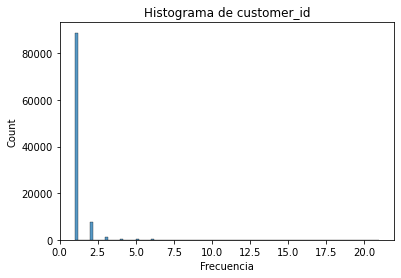

In [19]:
# Grafica frecuencia customer_id
df = pd.DataFrame(dfConsolidado['customer_id'].value_counts()).reset_index()
df.columns = ['customer_id', 'Frecuencia']
sns.histplot(x='Frecuencia', data=df, bins=100).set(title='Histograma de customer_id')

In [20]:
df.Frecuencia.value_counts()

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
10        8
8         8
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: Frecuencia, dtype: int64

In [21]:
dfConsolidado

,order_id,producto,customer_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff_4244733e,3ce436f183e68e07877b285a838db11a,5.0
1,130898c0987d1801452a8ed92a670612,cool_stuff_4244733e,e6eecc5a77de221464d1c4eaff0a9b64,5.0
2,532ed5e14e24ae1f0d735b91524b98b9,cool_stuff_4244733e,4ef55bf80f711b372afebcb7c715344a,4.0
3,6f8c31653edb8c83e1a739408b5ff750,cool_stuff_4244733e,30407a72ad8b3f4df4d15369126b20c9,5.0
4,7d19f4ef4d04461989632411b7e588b9,cool_stuff_4244733e,91a792fef70ecd8cc69d3c7feb3d12da,5.0
...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,ferramentas_jardim_4cc4d02e,050309b91cc5e04e68841938e7984aaf,5.0
112646,ffee31fb4b5e35c9123608015637c495,moveis_decoracao_b10ecf8e,11e0f43ab4e2d2c48348dd9332c0ef80,4.0
112647,fff7c4452f050315db1b3f24d9df5fcd,relogios_presentes_dd469c03,dec8952e97ef6124259c56914fb3569c,5.0
112648,fffa82886406ccf10c7b4e35c4ff2788,esporte_lazer_bbe7651f,a5201e1a6d71a8d21e869151bd5b4085,4.0


# Apriori

In [22]:
# Convierte el dataframe a formato de listas
df1 = dfConsolidado.groupby('order_id')['producto'].apply(list).reset_index(name='compras')
compras = list(df1['compras'])
compras[:20]

[['cool_stuff_4244733e'],
 ['pet_shop_e5f2d52b'],
 ['moveis_decoracao_c777355d'],
 ['perfumaria_7634da15'],
 ['ferramentas_jardim_ac6c3623'],
 ['utilidades_domesticas_ef92defd'],
 ['telefonia_8d4f2bb7'],
 ['ferramentas_jardim_557d8509'],
 ['beleza_saude_310ae3c1'],
 ['livros_tecnicos_4535b0e1'],
 ['beleza_saude_d63c1011'],
 ['fashion_bolsas_e_acessorios_f177554e'],
 ['cama_mesa_banho_99a4788c'],
 ['ferramentas_jardim_368c6c73', 'ferramentas_jardim_368c6c73'],
 ['esporte_lazer_8cab8aba'],
 ['consoles_games_3f27ac8e'],
 ['perfumaria_4fa33915'],
 ['esporte_lazer_b50c950a'],
 ['cool_stuff_5ed9eaf5'],
 ['cama_mesa_banho_553e0e75']]

In [23]:
# Aplicar el algoritmo apriori
association_rules = apriori(compras, min_support=0.00003, min_confidence=0.1, min_lift=1, min_length=2)
association_results = list(association_rules)

# Muestra la cantidad de reglas de asociación encontradas
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 51 reglas de asociación.


In [24]:
# Crea dataframe de canasta de artistas
canasta = {}
for i, item in enumerate(association_results):

    #Primer índice de la lista interna
    #Contiene elemento base y el adicional
    pair = item[0] 
    items = [x for x in pair]
    try:
        canasta[i] = {'Producto Recomendado':items[0],'Producto':items[1], 'Soporte':item[1], 'Confianza':item[2][0][2], 'Lift':item[2][0][3]}
    except:
        print(i)

artistas_canasta = pd.DataFrame.from_dict(canasta).T
artistas_canasta

,Producto Recomendado,Producto,Soporte,Confianza,Lift
0,automotivo_98d61056,automotivo_060cb193,0.000061,0.24,623.153684
1,automotivo_4fcb3d9a,automotivo_f4f67cca,0.000172,0.191011,336.541332
2,automotivo_dfb97c88,automotivo_a50acd33,0.000051,0.147059,174.815734
3,beleza_saude_0a4093a4,beleza_saude_e0cf7976,0.000041,0.1,75.317557
4,beleza_saude_b8a0d73b,beleza_saude_9bb8ca33,0.00003,0.1,308.33125
5,cama_mesa_banho_0be487fa,cama_mesa_banho_4d272fe2,0.00003,0.6,3482.329412
6,cama_mesa_banho_fb783e3e,cama_mesa_banho_0fa81e71,0.000041,0.181818,854.251082
7,cama_mesa_banho_42a2bd59,cama_mesa_banho_3cc4b421,0.00003,0.272727,1281.376623
8,cama_mesa_banho_3e5201fe,cama_mesa_banho_4f88323d,0.00003,0.333333,764.852713
9,cama_mesa_banho_42a2bd59,cama_mesa_banho_98b22c11,0.00003,0.142857,704.757143




# Filtrado colaborativo: medias ponderadas

In [26]:
# Calcula cantidad de reviews por usuario
dfUsuarioReviews = dfConsolidado.groupby(['customer_id']).size().reset_index(name='reviews')
print(dfUsuarioReviews.reviews.value_counts())
dfUsuarioReviews.head()

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
10        8
8         8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: reviews, dtype: int64


,customer_id,reviews
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [27]:
# Crea lista con usuarios con más de 1 review
usuarios = list(dfUsuarioReviews[dfUsuarioReviews['reviews']>1]['customer_id'])

# Crea DataFrame seleccionando de dfConsolidado los usuarios que tengan más de 1 review
dfUsuarioProducto = dfConsolidado[dfConsolidado['customer_id'].isin(usuarios)]

# Crea la matriz de review_score usuarios_productos_matrix
usuarios_productos_matrix = dfUsuarioProducto.pivot_table(values='review_score', index='customer_id', columns='producto')

# Rellena los faltantes de la matriz con 0
usuarios_productos_matrix = usuarios_productos_matrix.fillna(0)
print('Tamaño de la matriz usuarios_productos_matrix:', usuarios_productos_matrix.shape)
usuarios_productos_matrix.head()

Tamaño de la matriz usuarios_productos_matrix: (9803, 8157)


producto,agro_industria_e_comercio_026f43af,agro_industria_e_comercio_11250b0d,agro_industria_e_comercio_16d096fa,agro_industria_e_comercio_3bebad3c,agro_industria_e_comercio_4ea69fe7,agro_industria_e_comercio_672e757f,agro_industria_e_comercio_6ff1fc92,agro_industria_e_comercio_980ecbcc,agro_industria_e_comercio_a0fe1efb,agro_industria_e_comercio_a79e27ad,...,utilidades_domesticas_fb927c44,utilidades_domesticas_fbd4031d,utilidades_domesticas_fc64f94f,utilidades_domesticas_fdad06d0,utilidades_domesticas_fdff6fbf,utilidades_domesticas_fe7f10e5,utilidades_domesticas_ff40459c,utilidades_domesticas_ff85ff51,utilidades_domesticas_ff95ac47,utilidades_domesticas_ffbc8305
customer_id,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000bf8121c3412d3057d32371c5d3395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001450ebb4a77efb3d68be5f7887cb1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002f90a6eb386bc43bc9ba200db31a89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0031abfb953b66e998f67b09e7b11375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Función para encontrar k usuarios similares al usuario objetivo 
def similar_users(user_id, matrix, k=5):
    # Crea una matriz con el usuario a evaluar
    user = matrix[matrix.index == user_id]
    
    # Crea una matriz con los otros usuarios
    other_users = matrix[matrix.index != user_id]
    
    # Calcula la similaridad de coseno entre el usuario a evaluar y los demás usuarios
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # Crea una lista de indices de estos usuarios
    indices = other_users.index.tolist()
    
    # Crea un diccionario de pares entre indices de usuarios y sus similaridades
    index_similarity = dict(zip(indices, similarities))
    
    # Ordena por similaridad
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # Selecciona el top k de usuarios
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    
usuario = '00066ccbe787a588c52bd5ff404590e3'

# try it out
usuariosSimilares = similar_users(usuario, usuarios_productos_matrix)
print(usuariosSimilares)

['efbaae3495b126fbeeb4fedb5036fc2e', 'ed064a574e08a0062cf08d485375c9d0', 'dbe90c26448a3f8ff01b364f5b1e12a2', 'd2444de8891a512538c0a0f8487382a8', 'd1bfb5ee1b4214a9fc72449c13c85477']


In [29]:
# Funcion para recomendar los productos a aprtir de usuarios similares
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    
    # Selecciona los vectores de usuarios similares
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # Calcula la media sobre los usuarios similares
    similar_users = similar_users.mean(axis=0)
    # Convierte a DataFrame para facilitar ordenado y filtro
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    # Selecciona el vector del usuario actual
    user_df = matrix[matrix.index == user_index]
    # Transpone para facilitar el filtrado
    user_df_transposed = user_df.transpose()
    # Renombra la columna como review
    user_df_transposed.columns = ['review']
    # Selecciona los prodcutos no comprados hasta el momento
    user_df_transposed = user_df_transposed[user_df_transposed['review']==0]
    # Genera la lista de los productos que el usuario no ha comprado
    productos_unseen = user_df_transposed.index.tolist()
    
    # Filtra la media de reviews de usuarios similares para solo los productos que el usuario actual no ha visto
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(productos_unseen)]
    # Ordena el DataFrame
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # Selecciona el top n de indices de productos   
    top_n_productos = similar_users_df_ordered.head(items)
    top_n_productos_indices = top_n_productos.index.tolist()
    # Busca el nombre del producto
    productosRecomendados = dfConsolidado[dfConsolidado['producto'].isin(top_n_productos_indices)]
    return top_n_productos
    
    #return np.unique(productosRecomendados['producto'])

# Genera las recomendaciones de productos al usuario
recommend_item('00066ccbe787a588c52bd5ff404590e3', usuariosSimilares, usuarios_productos_matrix)

,mean
producto,
ferramentas_jardim_368c6c73,3.4
agro_industria_e_comercio_026f43af,0.0
moveis_decoracao_586bb93b,0.0
moveis_decoracao_61b82c5d,0.0
moveis_decoracao_60cfed7b,0.0


array(['agro_industria_e_comercio_026f43af',
       'ferramentas_jardim_368c6c73', 'moveis_decoracao_586bb93b',
       'moveis_decoracao_60cfed7b', 'moveis_decoracao_61b82c5d'],
      dtype=object)

# Filtrado colaborativo: basado en embeddings

In [30]:
# Crea lista con usuarios con más de 2 review
usuarios = list(dfUsuarioReviews[dfUsuarioReviews['reviews']>2]['customer_id'])

# Crea DataFrame seleccionando de dfConsolidado los usuarios que tengan más de 2 review
dfUsuarioProducto = dfConsolidado[dfConsolidado['customer_id'].isin(usuarios)]

# Crea la matriz de review_score usuarios_productos_matrix
usuarios_productos_matrix = dfUsuarioProducto.pivot_table(values='review_score', index='customer_id', columns='producto')

# Rellena los faltantes de la matriz con 0
usuarios_productos_matrix = usuarios_productos_matrix.fillna(0)
print('Tamaño de la matriz usuarios_productos_matrix:', usuarios_productos_matrix.shape)
usuarios_productos_matrix.head()

Tamaño de la matriz usuarios_productos_matrix: (2287, 2698)


producto,agro_industria_e_comercio_16d096fa,agro_industria_e_comercio_6ff1fc92,agro_industria_e_comercio_980ecbcc,agro_industria_e_comercio_a79e27ad,agro_industria_e_comercio_c183fd5d,alimentos_0c4a0f8a,alimentos_45a6892a,alimentos_4715eb4e,alimentos_492c2e63,alimentos_55f3ffb0,...,utilidades_domesticas_f201c94e,utilidades_domesticas_f3ce47cc,utilidades_domesticas_f4e71b15,utilidades_domesticas_f52b6b9e,utilidades_domesticas_f688535e,utilidades_domesticas_f7f59e61,utilidades_domesticas_f9471562,utilidades_domesticas_fdff6fbf,utilidades_domesticas_ff40459c,utilidades_domesticas_ff95ac47
customer_id,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00331de1659c7f4fb660c8810e6de3f5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00426311a53f3c052943c88b692a3be2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00796be07bfc87dad2e31ef15490a718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009ac0aeacb7e5c368452976385b7903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Visualiza la variabilidad explicada por cada componente principal
def graficaVarianza(val, ext):
    porcentajeVarianzaExplicada=np.sort(val**2/sum(val**2))[::-1]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(1,ext+1),porcentajeVarianzaExplicada[:ext], "o-")
    ax[0].set_xlabel('sigma')
    ax[0].set_title('Porcentaje de Varianza Explicada')
    ax[1].plot(range(1,ext+1),np.cumsum(porcentajeVarianzaExplicada[:ext]), "o-")
    ax[1].set_xlabel('sigma')
    ax[1].set_title('Porcentaje Acumulado de Varianza Explicada')
    plt.show()

Varianza explicada de la media de sigma


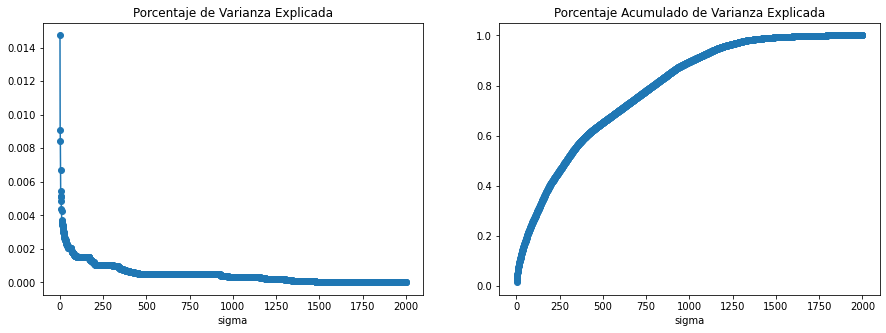

Con K=1470 se obtiene una varianza explicada de 0.9903880000000004


In [32]:
# Transformar a una matriz y centrar en cero utilizando la media de los reviews de cada cliente
R = usuarios_productos_matrix.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Calcula SVD con el máximo k
U, sigma, Vt = svds(R_demeaned, k=min(R_demeaned.shape)-1)

# Grafica la varianza explicada de la media de sigma
print('Varianza explicada de la media de sigma')
graficaVarianza(sigma, 2000)

# Muestra el valor de K necesario para lograr el 99% de varianza explicada de la media de sigma
var_explained = np.round(np.sort(sigma**2/np.sum(sigma**2))[::-1], decimals=6)
print('Con K=1470 se obtiene una varianza explicada de', sum(var_explained[0:1470]))

In [33]:
# Calcula SVD con k óptimo
U, sigma, Vt = svds(R_demeaned, k=1470)

# Convierte sigma en matriz diagonal
sigma = np.diag(sigma)

# Calcula la matriz de recomendaciones
db_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Convierte en dataframe la matriz de recomendaciones
recomendac_df = pd.DataFrame(db_recomendaciones, columns = usuarios_productos_matrix.columns, index=usuarios_productos_matrix.index)
recomendac_df.head()

KeyboardInterrupt: ignored

In [ ]:
recomendac_df.loc['00066ccbe787a588c52bd5ff404590e3',:]

In [ ]:
usuario = '00066ccbe787a588c52bd5ff404590e3'

# Top 10 de los productos por Filtrado colaborativo usando SVD excluyendo los que ya había comprado
df = pd.DataFrame(recomendac_df.loc[usuario,:]).sort_values(by=[usuario], ascending=False)
df = df.reset_index()
df.rename(columns={ 'index': 'producto', usuario: 'Promedio'}, inplace=True)
df[:10]

In [ ]:
# Grafica Recomendaciones de Usuario 8 por Filtrado colaborativo usando SVD
sns.barplot(x='Promedio', y='producto', data=df[:10]).set(title='Recomendaciones de Cliente por Filtrado colaborativo usando SVD')